In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import qutip as qt
import qutip

# -- References to Relevant Papers --
# "Entanglement-enhanced quantum metrology: From standard quantum limit to Heisenberg limit" (Huang et al.)
#

##I worked with this: Phase stimation by interferometry as of figure 2b (page 4) implemented with One axis Twisting (OAT), page 10-12.


In [3]:
# Parameters for preparation, sensing, and measurement times
T_total = 1.0  # Total fixed time for the experiment

# Fraction of time allocated for preparation and measurement
tau_prep_fraction = 0.1  # Fraction of time spent on preparation
tau_meas_fraction = 0.05  # Fraction of time spent on measurement
tau_sense_fraction = 1 - tau_prep_fraction - tau_meas_fraction  # Remaining time for sensing

def generate_coherent_state(j):
    """
    Generate a coherent spin state aligned along the x-axis.

    Based on the description of coherent states for metrology in Pezzé & Smerzi, Section III. [41†source].
    
    Parameters:
        j (float): Total spin quantum number (N/2).
    
    Returns:
        Qobj: Coherent spin state.
    """
    theta = np.pi / 2  # Aligned along the x-axis
    phi = 0  # No rotation around the z-axis
    return qt.spin_coherent(j, theta, phi)

def gen_css(j,theta,phi):
    return qt.spin_coherent(j, theta, phi)

def apply_squeezing_operator(squeezing_strength, J):
    """
    Apply a squeezing operator to the coherent state.

    The use of squeezing to improve phase sensitivity is discussed in Hayes et al., Section 2.2. [42†source].
    
    Parameters:
        j (float): Total spin quantum number.
        squeezing_strength (float): The strength of squeezing.
        Jy (Qobj): Spin operator along the z?-axis.
    
    Returns:
        Qobj: Squeezing operator.
    """
    squeezing_operator = (-1j * squeezing_strength * J**2).expm()
    return squeezing_operator

def time_evolve_state(H, state, t):
    """
    Perform time evolution of a quantum state under a Hamiltonian H for time t.

    Time evolution based on the Hamiltonian dynamics as outlined in Pezzé et al., Phys. Rev. A, 2020. Section II [41†source].
    
    Parameters:
        H (Qobj): Hamiltonian of the system.
        state (Qobj): Initial quantum state.
        t (float): Time of evolution.
    
    Returns:
        Qobj: Evolved quantum state after time t.
    """
    U = (-1j * H * t).expm()  # Time evolution operator U = exp(-i H t)
    return U * state

def measure_phase_variance(operator, state):
    """
    Measure the phase variance of the given state.

    Fisher Information and phase variance calculations are fundamental to quantum metrology, as discussed in Pezzé et al., Section III. [42†source].
    
    Parameters:
        operator (Qobj): Spin operator (typically Jz).
        state (Qobj): Quantum state (coherent or squeezed).
    
    Returns:
        float: Phase variance of the state.
    """
    return qt.variance(operator, state)

def calculate_fisher_information(N, sensing_time, is_entangled):
    """
    Calculate Fisher Information for both separable (SQL) and entangled (HL) states.

    This formula for Fisher Information scaling is adapted from Pezzé et al., Rev. Mod. Phys., 2018, page 6 [42†source].
    
    Parameters:
        N (int): Number of particles.
        sensing_time (float): The time spent in sensing.
        is_entangled (bool): If True, apply Heisenberg scaling for entangled states.
    
    Returns:
        float: Fisher Information.
    """
    if is_entangled:
        return N**2 * sensing_time**2  # Heisenberg scaling
    else:
        return N * sensing_time**2  # Standard Quantum Limit scaling

def calculate_r_value(F_sep, F_ent, total_time_sep, total_time_ent):
    """
    Calculate the metrological gain r, comparing separable and entangled strategies.

    This calculation is adapted from "Entanglement-enhanced quantum metrology", Section II. [42†source].
    
    Parameters:
        F_sep (float): Fisher Information for separable states.
        F_ent (float): Fisher Information for entangled states.
        total_time_sep (float): Total time for separable strategy.
        total_time_ent (float): Total time for entangled strategy.
    
    Returns:
        float: Metrological gain r.
    """
    return (F_ent / total_time_ent) / (F_sep / total_time_sep)



In [4]:
css6 = generate_coherent_state(20)

squeezing_strength1 = 0.199
Sz = qt.jmat(20, 'z')
Sx = qt.jmat(20, 'x')
squeezing_operator1 = apply_squeezing_operator(squeezing_strength1, Sz)
sqz6 = squeezing_operator1 * css6

squeezing_strength2 = 0.4 
squeezing_operator2 = apply_squeezing_operator(squeezing_strength2, Sz)
sqz6b = squeezing_operator2 * css6

print(qt.variance(Sx,css6),qt.variance(Sx,sqz6),qt.variance(Sx,sqz6b))
print(qt.variance(Sz,css6),qt.variance(Sz,sqz6),qt.variance(Sz,sqz6b))

0.0 129.35171901458477 204.34473931154795
9.999999999999995 9.999999999999995 9.999999999999995


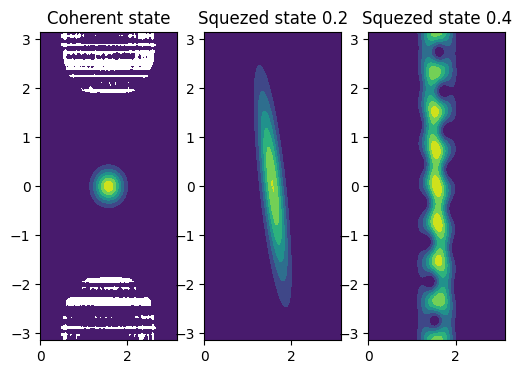

In [5]:
thetavec = np.linspace(0, np.pi, 100)
phivec = np.linspace(-np.pi,np.pi, 100)
fcss6,theta,phi = qt.spin_q_function(css6,thetavec,phivec)
fsqz6,theta1,phi1 = qt.spin_q_function(sqz6,thetavec,phivec)
fsqz6b,theta2,phi2 = qt.spin_q_function(sqz6b,thetavec,phivec)

fig,axes = plt.subplots(1,3,figsize=(6,4))
cont0 = axes[0].contourf(theta,phi,fcss6)
lbl0 = axes[0].set_title("Coherent state")

cont1 = axes[1].contourf(theta1, phi1,fsqz6)
lbl1 = axes[1].set_title("Squezed state 0.2")#

cont2 = axes[2].contourf(theta2, phi2,fsqz6b)
lbl2 = axes[2].set_title("Squezed state 0.4")#

#In [59]: cont0 = axes[2].contourf(xvec, xvec, Q_fock, 100)

#In [60]: lbl2 = axes[2].set_title("Fock state")"""

plt.show()

In [56]:
Sx = qt.jmat(N/2, 'x')
Sy = qt.jmat(N/2, 'y')
Sz = qt.jmat(N/2, 'z')

N = 40
mu = (24)**(1/6)*(N/2)**(-2/3)
A = 1-np.cos(mu)**(N-2)
B = np.sin(mu/2)*np.cos(mu/2)**(N-2)
delta = (1/2)*np.arctan(B/A)
print("nu_opt:", -delta)


css_x = generate_coherent_state(N/2)

Sx = qt.jmat(N/2, 'x')
Sy = qt.jmat(N/2, 'y')
Sz = qt.jmat(N/2, 'z')

print(qt.variance(Sy,css_x),qt.variance(Sz,css_x))

squeezing_strength1 = 0.199
for d in range(0,500):
    delta = -d/1000
    rot_spin_oper = (-1j * delta  *Sx).expm()*Sz* (1j * delta  *Sx).expm()
    squeezing_operator =apply_squeezing_operator(squeezing_strength1,rot_spin_oper)
    sqz_rot = squeezing_operator * css_x
    print(delta,qt.variance(Sy,sqz_rot),qt.variance(Sz,sqz_rot))

nu_opt: -0.06943411363163866
10.000000000000016 9.999999999999995
0.0 196.15068917210417 9.999999999999995
-0.001 196.2228009678829 9.92788820422103
-0.002 196.29454017396105 9.856148998143418
-0.003 196.3659065033802 9.78478266872384
-0.004 196.43689967067687 9.713789501427563
-0.005 196.5075193918776 9.643169780227142
-0.006 196.5777653845023 9.572923787601345
-0.007 196.64763736756984 9.503051804534078
-0.008 196.71713506159088 9.433554110513194
-0.009 196.78625818857486 9.364430983529353
-0.01 196.85500647202923 9.295682700074964
-0.011 196.9233796369612 9.22730953514309
-0.012 196.9913774098778 9.159311762226269
-0.013 197.05899951878874 9.091689653315553
-0.014 197.12624569320496 9.024443478899228
-0.015 197.19311566414265 8.957573507961959
-0.016 197.25960916412083 8.891080007983488
-0.017 197.3257259271669 8.824963244937763
-0.018 197.39146568881236 8.759223483291708
-0.019 197.45682818609995 8.693860986004323
-0.02 197.52181315757838 8.628876014525497
-0.021 197.58642034330893

In [ ]:
#For some reason, the optimal nu=-delta is not -0.06 but -0.185

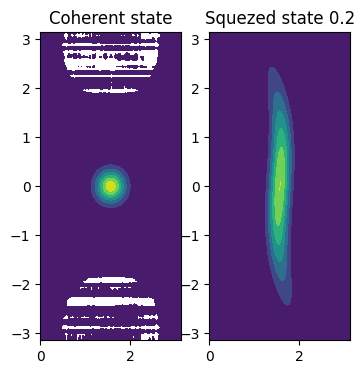

In [57]:
delta = -0.185
rot_spin_oper = (-1j * delta  *Sx).expm()*Sz* (1j * delta  *Sx).expm()
squeezing_operator =apply_squeezing_operator(squeezing_strength1,rot_spin_oper)
sqz_rot = squeezing_operator * css_x

thetavec = np.linspace(0, np.pi, 100)
phivec = np.linspace(-np.pi,np.pi, 100)
fcssx,theta,phi = qt.spin_q_function(css_rot,thetavec,phivec)
fsqzrot,theta1,phi1 = qt.spin_q_function(sqz_rot,thetavec,phivec)

fig,axes = plt.subplots(1,2,figsize=(4,4))
cont0 = axes[0].contourf(theta,phi,fcssx)
lbl0 = axes[0].set_title("Coherent state")

cont1 = axes[1].contourf(theta1, phi1,fsqzrot)
lbl1 = axes[1].set_title("Squeezed state 0.2")#

plt.show()

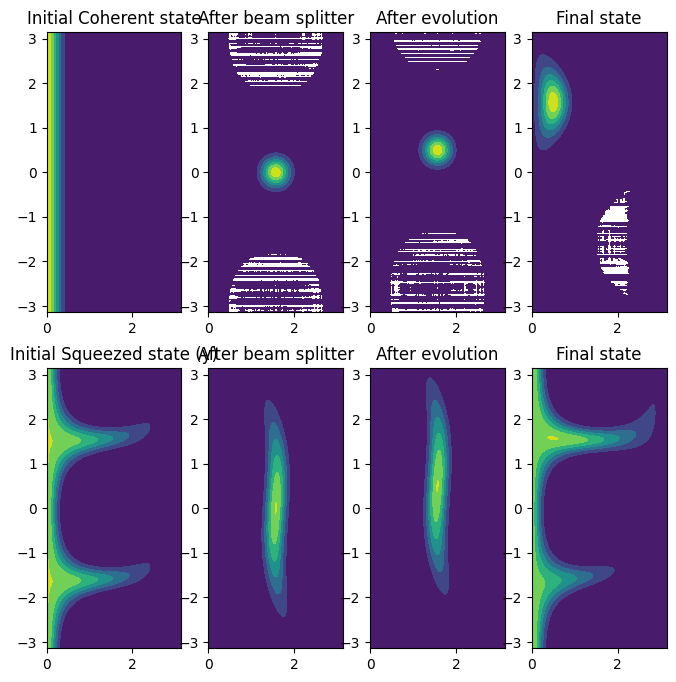

CSS. Estimated half cos: 0.4387912809451861    SQL variance: 0.0014365552941622184
Sqz. Estimated half cos: 0.2016741148412024    HL variance: 0.09141389924579638


In [62]:
N = 40
j = N / 2  # Total spin quantum number
        
# Define collective spin operators
Sx = qt.jmat(j, 'x')
Sy = qt.jmat(j, 'y')
Sz = qt.jmat(j, 'z')

# Separable (SQL) Strategy
css_z = gen_css(j,0,0) #initial state in north pole
      
H_sense = Sz  # Sensing Hamiltonian
time=0.5 #for instance
beam_spl_css = (-1j * np.pi/2  *Sy).expm()*css_z
evolved_css = time_evolve_state(H_sense, beam_spl_css, time)
final_css = (1j * np.pi/2  *Sy).expm()*evolved_css
        #Description of what is done in Fig 2b

expected_value_sql = qt.expect(Sz,final_css)/N
phase_var_sql = qt.variance(Sz, final_css)/N**2
#phase_variance_sql.append(phase_var_sql/N**2) 
#Since we stimate N*phase, to get the variance in theta estimation we have to divide by N**2
        
        

# Entangled (HL) Strategy. One axis twisting version. squeezing in y
squeezing_strength = 0.199 

delta = -0.185
rot_spin_oper = (-1j * delta  *Sz).expm()*Sx* (1j * delta  *Sz).expm()
squeezing_operator =apply_squeezing_operator(squeezing_strength1,rot_spin_oper)
sss = squeezing_operator * css_z
beam_spl_sss = (-1j * np.pi/2  *Sy).expm()*sss
evolved_sss = time_evolve_state(H_sense, beam_spl_sss, time)
final_sss = (1j * np.pi/2  *Sy).expm()*evolved_sss
expected_value_hl = qt.expect(Sz,final_sss)/N
phase_var_hl = qt.variance(Sz, final_sss)/N**2

thetavec = np.linspace(0, np.pi, 200)
phivec = np.linspace(-np.pi,np.pi, 200)
initialcss,theta,phi = qt.spin_q_function(css_z,thetavec,phivec)
beamcss,theta1,phi1 = qt.spin_q_function(beam_spl_css,thetavec,phivec)
evolvecss,theta2,phi2 = qt.spin_q_function(evolved_css,thetavec,phivec)
finalcss,theta3,phi3 = qt.spin_q_function(final_css,thetavec,phivec)

initialsss,theta4,phi4 = qt.spin_q_function(sss,thetavec,phivec)
beamsss,theta5,phi5 = qt.spin_q_function(beam_spl_sss,thetavec,phivec)
evolvesss,theta6,phi6 = qt.spin_q_function(evolved_sss,thetavec,phivec)
finalsss,theta7,phi7 = qt.spin_q_function(final_sss,thetavec,phivec)

fig,axes = plt.subplots(2,4,figsize=(8,8))
cont0 = axes[0,0].contourf(theta,phi,initialcss)
lbl0 = axes[0,0].set_title("Initial Coherent state")

cont1 = axes[0,1].contourf(theta1, phi1,beamcss)
lbl1 = axes[0,1].set_title("After beam splitter")#

cont2 = axes[0,2].contourf(theta2, phi2,evolvecss)
lbl2 = axes[0,2].set_title("After evolution")#

cont3 = axes[0,3].contourf(theta3, phi3,finalcss)
lbl3 = axes[0,3].set_title("Final state")#

cont4 = axes[1,0].contourf(theta4,phi4,initialsss)
lbl4 = axes[1,0].set_title("Initial Squeezed state (y)")

cont5 = axes[1,1].contourf(theta5, phi5,beamsss)
lbl5 = axes[1,1].set_title("After beam splitter")#

cont6 = axes[1,2].contourf(theta6, phi6,evolvesss)
lbl6 = axes[1,2].set_title("After evolution")#

cont7 = axes[1,3].contourf(theta7, phi7,finalsss)
lbl7 = axes[1,3].set_title("Final state")#

plt.show()

print("CSS. Estimated half cos:",expected_value_sql,"   SQL variance:", phase_var_sql)
print("Sqz. Estimated half cos:",expected_value_hl,"   HL variance:", phase_var_hl)


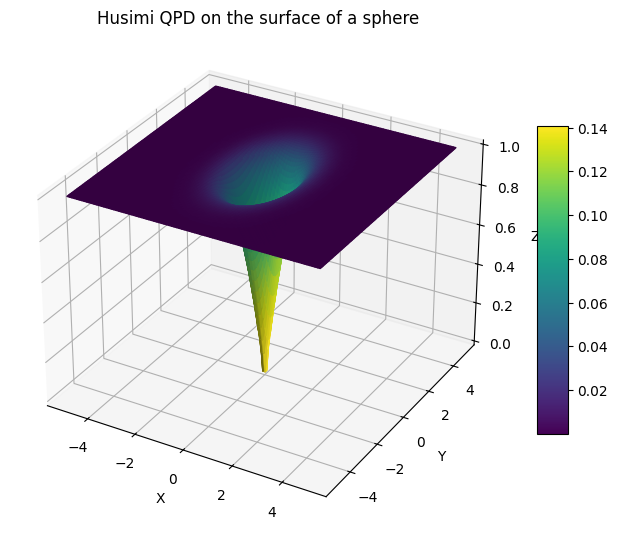

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the squeezed vacuum state
r = 0.5  # Squeezing parameter
squeezed_vacuum = squeeze(10, r) * basis(10, 0)

# Create a range for phase space quadratures
xvec = np.linspace(-5, 5, 100)
yvec = np.linspace(-5, 5, 100)

# Compute the Q-function (Husimi Q distribution)
Q = qfunc(squeezed_vacuum, xvec, yvec)

# Create meshgrid for phase space quadratures
X, Y = np.meshgrid(xvec, yvec)

# Normalize the Q-function to use it as radius on a sphere (scaled to fit the sphere)
R = Q / np.max(Q)

# Cartesian coordinates for the sphere with the QPD mapped onto the surface
Z = np.sqrt(1 - R**2)  # Ensuring points stay on the unit sphere

# Plot the QPD on the surface of a sphere using Cartesian coordinates
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface and assign the color data (Q function values) to the surface
surface = ax.plot_surface(X, Y, Z, facecolors=cm.viridis(Q / np.max(Q)), rstride=1, cstride=1, antialiased=True)

# Add color bar and link it to the surface plot (mappable)
m = cm.ScalarMappable(cmap=cm.viridis)
m.set_array(Q)  # Link color map to Q-function values
fig.colorbar(m, ax=ax, shrink=0.5, aspect=10)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Husimi QPD on the surface of a sphere')

# Display the plot
plt.show()


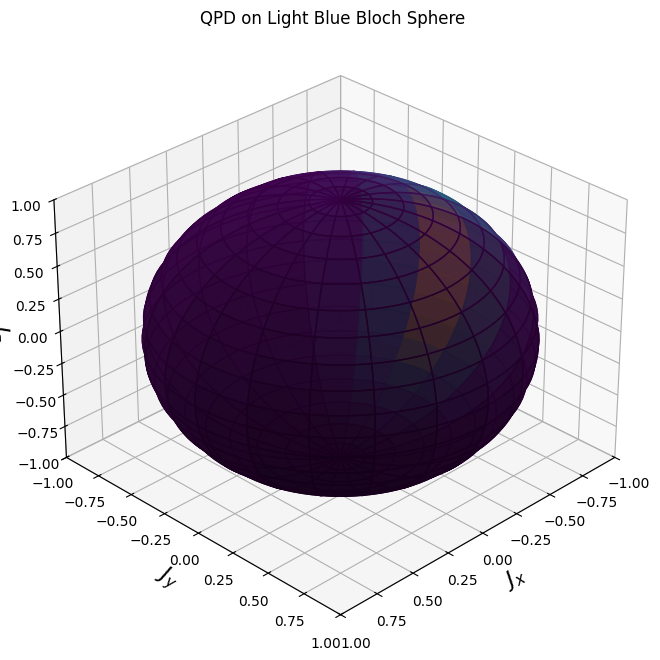

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create a basic Bloch sphere object
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Parameters for the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates for the sphere
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the Bloch sphere in light blue
ax.plot_surface(x, y, z, color='lightblue', alpha=0.6, rstride=5, cstride=5, edgecolor='k', linewidth=0.3)

# Create a 2D Gaussian distribution to simulate the QPD on the surface
def gaussian(x, y, x0, y0, sigma):
    return np.exp(-((x - x0) ** 2 + (y - y0) ** 2) / (2 * sigma ** 2))

# Set the location for the QPD on the sphere surface
x0, y0 = -1, 0  # Center of the distribution on the Bloch sphere surface
sigma = 0.3  # Spread of the distribution
QPD = gaussian(x, y, x0, y0, sigma)

# Plot the QPD on the surface with a color map (overlaid on top of the light blue sphere)
ax.plot_surface(x, y, z, facecolors=cm.viridis(QPD / np.max(QPD)), rstride=5, cstride=5, alpha=0.8)

# Label the axes
ax.set_xlabel(r'$J_x$', fontsize=16)
ax.set_ylabel(r'$J_y$', fontsize=16)
ax.set_zlabel(r'$J_z$', fontsize=16)

# Set the limits and view angle to make it look more like the example
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.view_init(30, 45)

# Add title
ax.set_title('QPD on Light Blue Bloch Sphere')

plt.show()


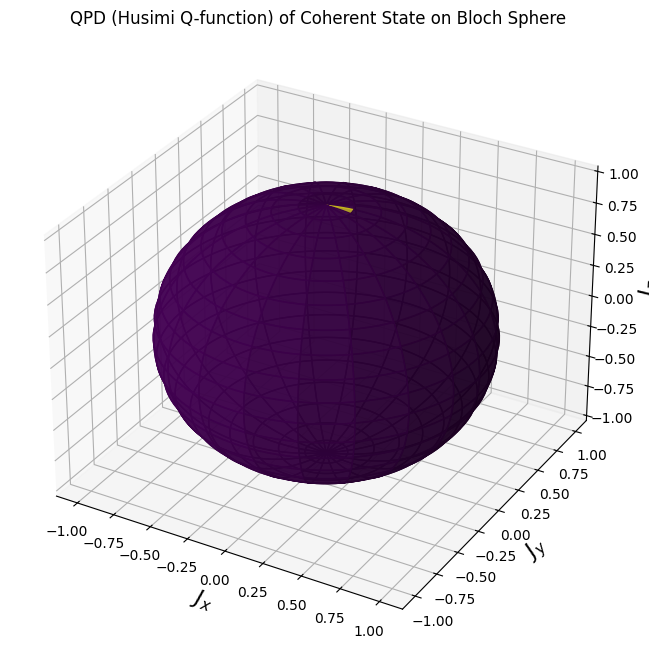

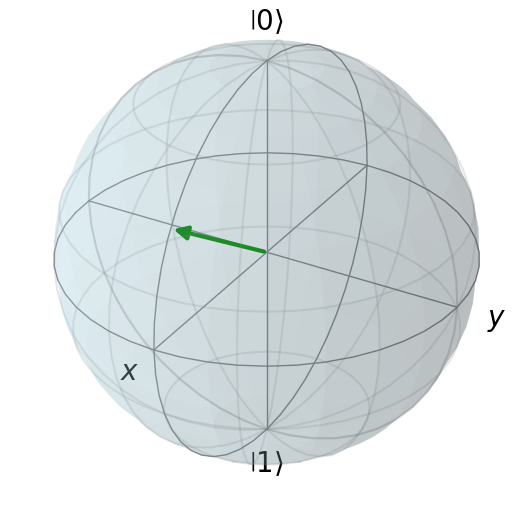

In [47]:
from qutip import Bloch, coherent, qfunc
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Step 1: Define coherent state
alpha = 1.0  # Coherent state parameter (in phase space)
coherent_state = coherent(10, alpha)  # Coherent state in a 10-dimensional Hilbert space

# Step 2: Create a phase space grid
xvec = np.linspace(-3, 3, 100)
yvec = np.linspace(-3, 3, 100)

# Step 3: Compute the Husimi Q-function of the coherent state
Q = qfunc(coherent_state, xvec, yvec)

# Normalize the Q-function for visualization
Q = Q / np.max(Q)

# Step 4: Create spherical coordinates for mapping the Q-function onto a unit sphere
theta = np.linspace(0, np.pi, 100)  # Polar angle
phi = np.linspace(0, 2 * np.pi, 100)  # Azimuthal angle
theta, phi = np.meshgrid(theta, phi)

# Convert spherical coordinates to Cartesian for mapping on Bloch sphere
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Step 5: Create a Bloch object
b = Bloch()

# Set the appearance of the Bloch sphere
b.sphere_color = 'lightblue'

# Step 6: Add a vector representing the coherent state to the Bloch sphere
# For a coherent state with alpha, the vector points in the direction [cos(Re(alpha)), sin(Re(alpha)), cos(Im(alpha))]
b.add_vectors([np.sin(np.real(alpha)), 0, np.cos(np.real(alpha))])

# Step 7: Overlay the QPD (Husimi Q-function) on the Bloch sphere
# Use a 3D plot to map the Q-function onto the surface of the sphere
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Interpolate the Q-function for correct mapping on the sphere
Q_sphere = np.zeros_like(x)

# Mapping 2D Q function onto the sphere
for i in range(len(xvec)):
    for j in range(len(yvec)):
        theta_idx = np.argmin(np.abs(theta[:, 0] - (np.pi / 2 - np.arctan2(yvec[j], xvec[i]))))
        phi_idx = np.argmin(np.abs(phi[0, :] - np.arctan2(yvec[j], xvec[i])))
        Q_sphere[theta_idx, phi_idx] = Q[j, i]

# Plot the QPD using facecolors to represent the Husimi Q-function on the sphere's surface
ax.plot_surface(x, y, z, facecolors=cm.viridis(Q_sphere / np.max(Q_sphere)), rstride=5, cstride=5, alpha=0.8)

# Step 8: Customize the plot (axes labels, title, etc.)
ax.set_xlabel(r'$J_x$', fontsize=16)
ax.set_ylabel(r'$J_y$', fontsize=16)
ax.set_zlabel(r'$J_z$', fontsize=16)
ax.set_title("QPD (Husimi Q-function) of Coherent State on Bloch Sphere")

# Show the plot
plt.show()

# Render the Bloch sphere in another plot
b.show()


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm, comb

# Parameters
N = 50
J = N / 2
chi_t_values = [0.0, 0.0767, 0.2330, np.pi/8, np.pi/3, np.pi/2]
theta0 = np.pi / 2
phi0 = 0

# Grid for theta and phi
theta = np.linspace(0, np.pi, 200)
phi = np.linspace(-np.pi, np.pi, 200)
Theta, Phi = np.meshgrid(theta, phi)

# Function to compute coherent spin state overlaps
def coherent_state_overlap(theta, phi, theta0, phi0, J):
    delta = np.arccos(np.cos(theta) * np.cos(theta0) + np.sin(theta) * np.sin(theta0) * np.cos(phi - phi0))
    return (np.cos(delta / 2))**(2*J)

# Adjusted Husimi function calculation
def compute_husimi(state_coeffs, theta, phi, J):
    Q = np.zeros_like(theta, dtype=np.float64)  # Initialize Q as real
    for m in range(int(-J), int(J)+1):
        # Compute overlap using spherical harmonics
        Y_m = sph_harm(m, int(J), phi, theta)  # Spherical harmonic function
        # Sum the absolute square of the overlaps
        Q += np.abs(state_coeffs[int(m+J)] * Y_m)**2
    # Normalize properly
    Q *= (2*J + 1) / (4 * np.pi)
    return Q


# Function to compute Wigner function W(theta, phi)
def compute_wigner(rho, theta, phi, J):
    W = np.zeros_like(theta, dtype=np.complex128)  # Initialize W as complex
    for m1 in range(int(-J), int(J)+1):
        for m2 in range(int(-J), int(J)+1):
            Y_m1 = sph_harm(m1, int(J), phi, theta)  # Complex spherical harmonic
            Y_m2 = sph_harm(m2, int(J), phi, theta)
            W += rho[int(m1+J), int(m2+J)] * Y_m1 * np.conj(Y_m2)
    W *= (2*J + 1) / (4 * np.pi)
    W = W.real  # Take the real part for plotting
    return W

# Time evolution and plotting
for chi_t in chi_t_values:
    # Compute state coefficients after time evolution
    m_vals = np.arange(-J, J+1)
    initial_coeffs = np.array([
        np.exp(-1j * m * phi0) * comb(2*J, J+m)**0.5 * (np.sin(theta0/2))**(J - m) * (np.cos(theta0/2))**(J + m)
        for m in m_vals
    ], dtype=np.complex128)
    phase_factors = np.exp(-1j * chi_t * m_vals**2)
    state_coeffs = initial_coeffs * phase_factors

    # Density matrix
    rho = np.outer(state_coeffs, np.conj(state_coeffs))

    # Compute Husimi function
    Q = compute_husimi(state_coeffs, Theta, Phi, J)

    # Compute Wigner function
    W = compute_wigner(rho, Theta, Phi, J)

    # Apply Mercator projection
    X = Phi
    Y = np.log(np.tan(Theta / 2) + 1e-10)  # Added small value to avoid log(0)

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    # Husimi function plot
    c1 = axs[0].pcolormesh(X, Y, Q, shading='auto', cmap='viridis')
    axs[0].set_title(f'Husimi Function at χt = {chi_t:.4f}')
    axs[0].set_xlabel('φ')
    axs[0].set_ylabel('Mercator Projection Y')
    fig.colorbar(c1, ax=axs[0])

    # Wigner function plot
    c2 = axs[1].pcolormesh(X, Y, W, shading='auto', cmap='RdBu')
    axs[1].set_title(f'Wigner Function at χt = {chi_t:.4f}')
    axs[1].set_xlabel('φ')
    axs[1].set_ylabel('Mercator Projection Y')
    fig.colorbar(c2, ax=axs[1])

    plt.tight_layout()
    plt.show()


ImportError: cannot import name 'spin_coherent_state' from 'qutip' (/opt/homebrew/anaconda3/envs/sensing/lib/python3.12/site-packages/qutip/__init__.py)

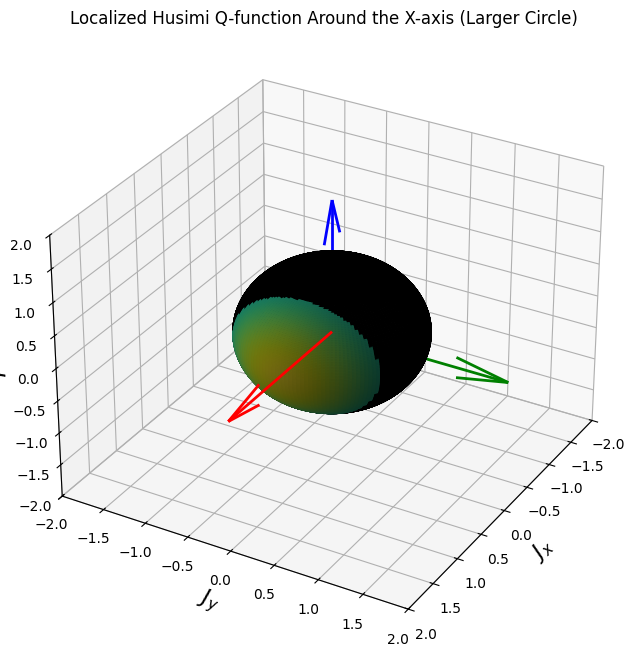

In [70]:
from qutip import spin_coherent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Function to generate grid for theta and phi
def generate_spherical_grid(grid_size):
    theta = np.linspace(0, np.pi, grid_size)
    phi = np.linspace(0, 2 * np.pi, grid_size)
    return np.meshgrid(theta, phi)

# Function to convert spherical coordinates to Cartesian for the Bloch sphere
def spherical_to_cartesian(theta_sphere, phi_sphere):
    x = np.sin(theta_sphere) * np.cos(phi_sphere)
    y = np.sin(theta_sphere) * np.sin(phi_sphere)
    z = np.cos(theta_sphere)
    return x, y, z

# Function to compute Husimi Q-function for spin coherent state
def compute_husimi_qfunc(j, theta_sphere, phi_sphere, spin_coherent_state):
    Q_spin = np.zeros_like(theta_sphere)
    for i in range(len(theta_sphere)):
        for k in range(len(phi_sphere)):
            test_state = spin_coherent(j, theta_sphere[i, k], phi_sphere[i, k])
            Q_spin[i, k] = np.abs(spin_coherent_state.overlap(test_state)) ** 2
    return Q_spin / np.max(Q_spin)

# Parameters for spin coherent state aligned along the x-axis
j = 1
theta_ref = np.pi / 2
phi_ref = 0

# Create the spin coherent state aligned along the x-axis
spin_coherent_state = spin_coherent(j, theta_ref, phi_ref)

# Generate a larger grid with 300 points for more detail
grid_size = 300
theta_sphere, phi_sphere = generate_spherical_grid(grid_size)

# Convert spherical coordinates to Cartesian
x, y, z = spherical_to_cartesian(theta_sphere, phi_sphere)

# Compute the Husimi Q-function and apply a lower threshold to make the circle larger
Q_spin = compute_husimi_qfunc(j, theta_sphere, phi_sphere, spin_coherent_state)
Q_spin_masked = np.ma.masked_where(Q_spin < 0.6, Q_spin)  # Mask values below 60% for a larger region

# Function to plot the Bloch sphere with Husimi Q-function
def plot_bloch_sphere(x, y, z, Q_spin_masked):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the white Bloch sphere
    ax.plot_surface(x, y, z, color='white', rstride=2, cstride=2, alpha=1, edgecolor='black')

    # Plot the Husimi Q-function as a localized distribution around the x-axis
    ax.plot_surface(x, y, z, facecolors=cm.viridis(Q_spin_masked), rstride=2, cstride=2, alpha=0.8)

    # Mark the x, y, z axes with arrows
    ax.quiver(0, 0, 0, 2, 0, 0, color='red', linewidths=2)  # x-axis
    ax.quiver(0, 0, 0, 0, 2, 0, color='green', linewidths=2)  # y-axis
    ax.quiver(0, 0, 0, 0, 0, 2, color='blue', linewidths=2)  # z-axis

    # Customize the plot labels
    ax.set_xlabel(r'$J_x$', fontsize=16)
    ax.set_ylabel(r'$J_y$', fontsize=16)
    ax.set_zlabel(r'$J_z$', fontsize=16)
    ax.set_title("Localized Husimi Q-function Around the X-axis (Larger Circle)")

    # Adjust the view angle for better visibility
    ax.view_init(elev=30, azim=30)

    # Set axis limits to focus the view
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])

    plt.show()

# Plot the updated Bloch sphere with larger circle and more grids
plot_bloch_sphere(x, y, z, Q_spin_masked)


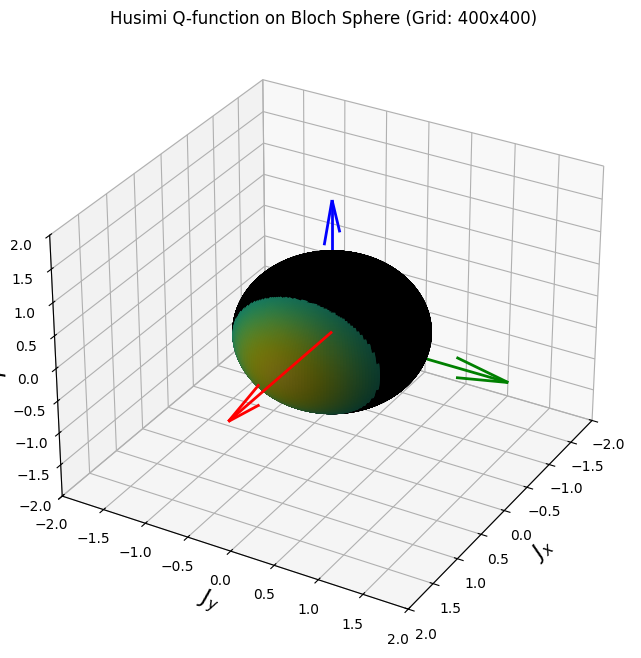

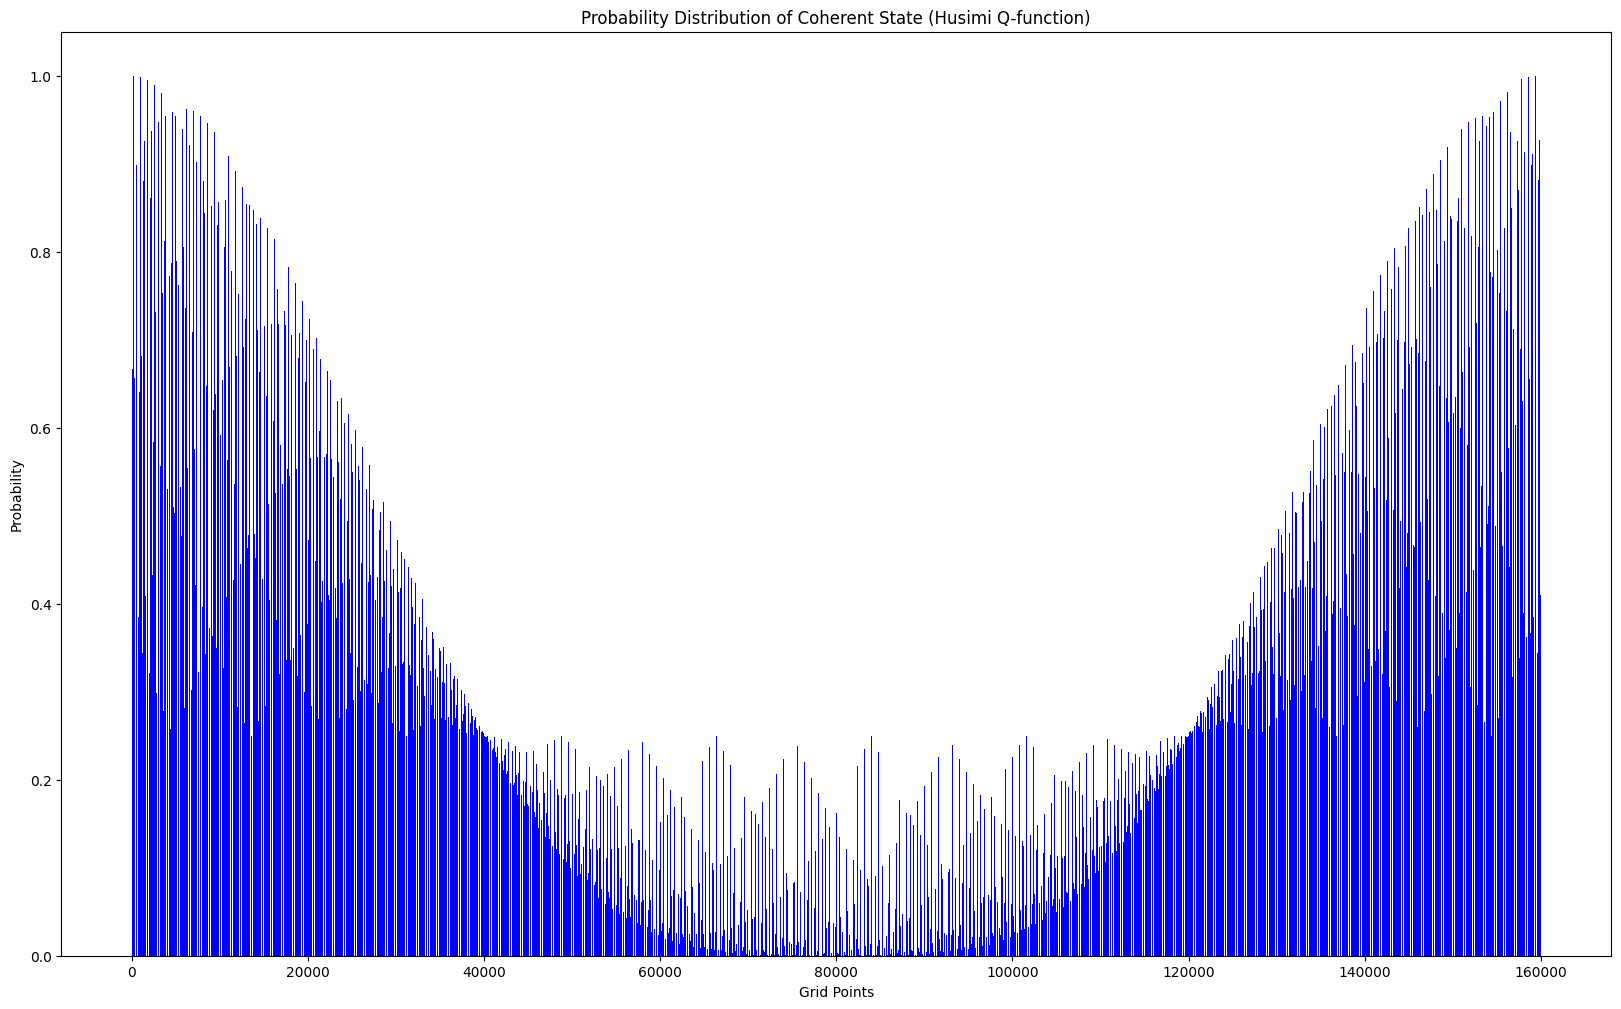

Percentage of grid elements covered by the coherent state (P >= 0.6): 16.45%


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import spin_coherent
from matplotlib import cm

# Function to compute Husimi Q-function for the spin coherent state
def husimi_qfunc(j, theta_sphere, phi_sphere, spin_coherent_state):
    Q_spin = np.zeros_like(theta_sphere)
    for i in range(len(theta_sphere)):
        for k in range(len(phi_sphere)):
            test_state = spin_coherent(j, theta_sphere[i, k], phi_sphere[i, k])
            Q_spin[i, k] = np.abs(spin_coherent_state.overlap(test_state)) ** 2
    return Q_spin / np.max(Q_spin)  # Normalize the Husimi Q-function

# Function to plot the Husimi Q-function on the Bloch sphere
def plot_husimi_on_bloch(theta_sphere, phi_sphere, Q_spin_masked, grid_size):
    x = np.sin(theta_sphere) * np.cos(phi_sphere)
    y = np.sin(theta_sphere) * np.sin(phi_sphere)
    z = np.cos(theta_sphere)
    
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the white Bloch sphere
    ax.plot_surface(x, y, z, color='white', rstride=2, cstride=2, alpha=1, edgecolor='black')

    # Plot the Husimi Q-function as a localized distribution
    ax.plot_surface(x, y, z, facecolors=cm.viridis(Q_spin_masked), rstride=2, cstride=2, alpha=0.8)

    # Mark the x, y, z axes with arrows
    ax.quiver(0, 0, 0, 2, 0, 0, color='red', linewidths=2)  # x-axis
    ax.quiver(0, 0, 0, 0, 2, 0, color='green', linewidths=2)  # y-axis
    ax.quiver(0, 0, 0, 0, 0, 2, color='blue', linewidths=2)  # z-axis

    ax.set_xlabel(r'$J_x$', fontsize=16)
    ax.set_ylabel(r'$J_y$', fontsize=16)
    ax.set_zlabel(r'$J_z$', fontsize=16)
    ax.set_title(f"Husimi Q-function on Bloch Sphere (Grid: {grid_size}x{grid_size})")

    ax.view_init(elev=30, azim=30)  # Adjust the view
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])

    plt.show()




# Function to plot the Husimi Q-function as a bar chart and calculate coverage
def plot_qfunc_bar_chart(Q_spin, threshold):
    Q_spin_flat = Q_spin.flatten()

    # Plot the Husimi Q-function as a bar chart
    plt.figure(figsize=(20, 12))
    plt.bar(np.arange(len(Q_spin_flat)), Q_spin_flat, color='blue')
    plt.title("Probability Distribution of Coherent State (Husimi Q-function)")
    plt.xlabel("Grid Points")
    plt.ylabel("Probability")
    plt.show()

    # Calculate the percentage of grid elements covered by the coherent state
    covered_elements = np.sum(Q_spin_flat >= threshold)
    total_elements = len(Q_spin_flat)
    percentage_covered = (covered_elements / total_elements) * 100
    print(f"Percentage of grid elements covered by the coherent state (P >= {threshold}): {percentage_covered:.2f}%")
    return percentage_covered

# Main function to execute all tasks
def main():
    j = 1
    theta_ref = np.pi / 2  # Coherent state aligned along the x-axis (latitude)
    phi_ref = 0  # Coherent state aligned along the x-axis (longitude)

    spin_coherent_state = spin_coherent(j, theta_ref, phi_ref)

    grid_size = 400
    theta_sphere = np.linspace(0, np.pi, grid_size)
    phi_sphere = np.linspace(0, 2 * np.pi, grid_size)
    theta_sphere, phi_sphere = np.meshgrid(theta_sphere, phi_sphere)

    # Compute the Husimi Q-function
    Q_spin = husimi_qfunc(j, theta_sphere, phi_sphere, spin_coherent_state)

    # Mask values below a certain threshold
    threshold = 0.6  # Adjust this value for the Husimi Q-function plot on Bloch sphere
    Q_spin_masked = np.ma.masked_where(Q_spin < threshold, Q_spin)

    # Plot the Husimi Q-function on the Bloch sphere
    plot_husimi_on_bloch(theta_sphere, phi_sphere, Q_spin_masked, grid_size)

    # Plot the probability distribution as a bar chart and calculate the percentage of coverage
    plot_qfunc_bar_chart(Q_spin, threshold)

# Run the main function
main()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import spin_coherent
from matplotlib import cm

def plot_husimi_bloch(state, j, grid_size=300, threshold=0.6):
   """
   Function to plot the Husimi Q-function of a given state on the Bloch sphere.
   
   Parameters:
   - state: Coherent state to be evaluated and plotted.
   - j: Spin quantum number for the system.
   - grid_size: Resolution of the theta/phi grid on the Bloch sphere (default: 300x300).
   - threshold: Probability threshold for masking (default: 0.6).
   """

   # Generate grid for theta and phi on the Bloch sphere
   theta_sphere = np.linspace(0, np.pi, grid_size)
   phi_sphere = np.linspace(0, 2 * np.pi, grid_size)
   theta_sphere, phi_sphere = np.meshgrid(theta_sphere, phi_sphere)

   # Initialize the Q-function storage
   Q_spin = np.zeros_like(theta_sphere)

   # Compute the Husimi Q-function for the given state
   for i in range(len(theta_sphere)):
      for k in range(len(phi_sphere)):
         # Generate test coherent state at each grid point
         test_state = spin_coherent(j, theta_sphere[i, k], phi_sphere[i, k])
         # Calculate the overlap and square the magnitude for the Husimi Q-function
         Q_spin[i, k] = np.abs(state.overlap(test_state)) ** 2

   # Normalize the Q-function
   Q_spin = Q_spin / np.max(Q_spin)

   # Mask values below a threshold to focus on higher probabilities
   Q_spin_masked = np.ma.masked_where(Q_spin < threshold, Q_spin)

   # Convert spherical coordinates to Cartesian for Bloch sphere mapping
   x = np.sin(theta_sphere) * np.cos(phi_sphere)
   y = np.sin(theta_sphere) * np.sin(phi_sphere)
   z = np.cos(theta_sphere)

   # Plot the Husimi Q-function on the Bloch sphere
   fig = plt.figure(figsize=(8, 8))
   ax = fig.add_subplot(111, projection='3d')

   # Plot the white Bloch sphere
   ax.plot_surface(x, y, z, color='white', rstride=2, cstride=2, alpha=1, edgecolor='black')

   # Overlay the Husimi Q-function
   ax.plot_surface(x, y, z, facecolors=cm.viridis(Q_spin_masked), rstride=2, cstride=2, alpha=0.8)

   # Plot x, y, z axis arrows
   ax.quiver(0, 0, 0, 2, 0, 0, color='red', linewidths=2)  # x-axis
   ax.quiver(0, 0, 0, 0, 2, 0, color='green', linewidths=2)  # y-axis
   ax.quiver(0, 0, 0, 0, 0, 2, color='blue', linewidths=2)  # z-axis

   # Set labels and title
   ax.set_xlabel(r'$J_x$', fontsize=16)
   ax.set_ylabel(r'$J_y$', fontsize=16)
   ax.set_zlabel(r'$J_z$', fontsize=16)
   ax.set_title(f"Husimi Q-function on Bloch Sphere for State (Grid: {grid_size}x{grid_size})")

   # Adjust viewing angle for clarity
   ax.view_init(elev=30, azim=30)
   
   # Set axis limits
   ax.set_xlim([-2, 2])
   ax.set_ylim([-2, 2])
   ax.set_zlim([-2, 2])

   plt.show()

# Example usage
if __name__ == "__main__":
   j = 1  # Spin quantum number
   theta_ref = np.pi / 2  # Coherent state reference theta
   phi_ref = 0  # Coherent state reference phi

   # Generate a reference coherent state
   coherent_state = spin_coherent(j, theta_ref, phi_ref)

   # Call the function with the generated coherent state
   plot_husimi_bloch(coherent_state, j, grid_size=2000, threshold=0.6)


KeyboardInterrupt: 

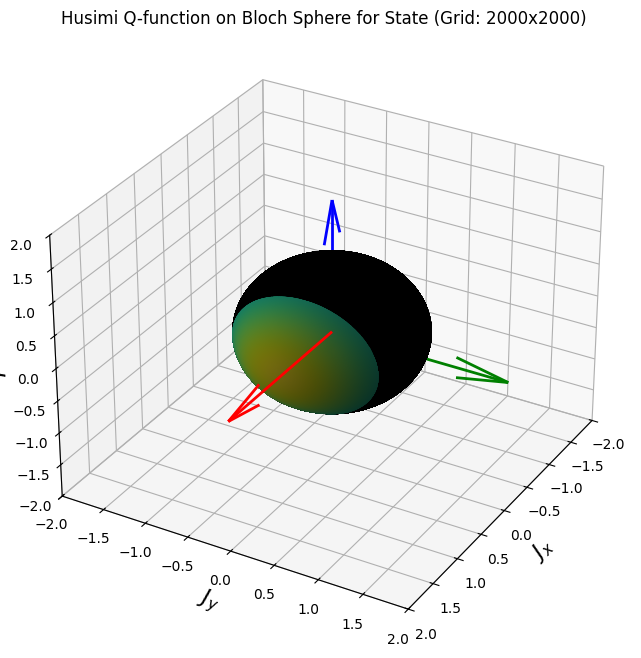

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from qutip import spin_coherent

def plot_husimi_bloch(state, j, grid_size=300, threshold=0.6):
    """
    Function to plot the Husimi Q-function of a given state on the Bloch sphere.
    
    Parameters:
    - state: Coherent state to be evaluated and plotted.
    - j: Spin quantum number for the system.
    - grid_size: Resolution of the theta/phi grid on the Bloch sphere (default: 300x300).
    - threshold: Probability threshold for masking (default: 0.6).
    """

    # Generate grid for theta and phi on the Bloch sphere
    theta_sphere = np.linspace(0, np.pi, grid_size)
    phi_sphere = np.linspace(0, 2 * np.pi, grid_size)
    theta_sphere, phi_sphere = np.meshgrid(theta_sphere, phi_sphere)

    # Vectorized computation of test states
    test_states = np.array([spin_coherent(j, theta, phi).full().flatten() 
                            for theta, phi in zip(theta_sphere.flatten(), phi_sphere.flatten())])

    # Vectorized computation of Q-function
    Q_spin = np.abs(test_states @ state.full()) ** 2
    Q_spin = Q_spin.reshape(theta_sphere.shape)

    # Normalize the Q-function
    Q_spin = Q_spin / np.max(Q_spin)

    # Mask values below a threshold to focus on higher probabilities
    Q_spin_masked = np.ma.masked_where(Q_spin < threshold, Q_spin)

    # Convert spherical coordinates to Cartesian for Bloch sphere mapping
    x = np.sin(theta_sphere) * np.cos(phi_sphere)
    y = np.sin(theta_sphere) * np.sin(phi_sphere)
    z = np.cos(theta_sphere)

    # Plot the Husimi Q-function on the Bloch sphere
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the white Bloch sphere
    ax.plot_surface(x, y, z, color='white', rstride=2, cstride=2, alpha=1, edgecolor='black')

    # Overlay the Husimi Q-function
    ax.plot_surface(x, y, z, facecolors=cm.viridis(Q_spin_masked), rstride=2, cstride=2, alpha=0.8)

    # Plot x, y, z axis arrows
    ax.quiver(0, 0, 0, 2, 0, 0, color='red', linewidths=2)  # x-axis
    ax.quiver(0, 0, 0, 0, 2, 0, color='green', linewidths=2)  # y-axis
    ax.quiver(0, 0, 0, 0, 0, 2, color='blue', linewidths=2)  # z-axis

    # Set labels and title
    ax.set_xlabel(r'$J_x$', fontsize=16)
    ax.set_ylabel(r'$J_y$', fontsize=16)
    ax.set_zlabel(r'$J_z$', fontsize=16)
    ax.set_title(f"Husimi Q-function on Bloch Sphere for State (Grid: {grid_size}x{grid_size})")

    # Adjust viewing angle for clarity
    ax.view_init(elev=30, azim=30)
    
    # Set axis limits
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])

    plt.show()

# Example usage
if __name__ == "__main__":
    j = 1  # Spin quantum number
    theta_ref = np.pi / 2  # Coherent state reference theta
    phi_ref = 0  # Coherent state reference phi

    # Generate a reference coherent state
    coherent_state = spin_coherent(j, theta_ref, phi_ref)

    # Call the function with the generated coherent state
    plot_husimi_bloch(coherent_state, j, grid_size=2000, threshold=0.6)